<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    Machine Learning 01
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
  Regression / Simple Linear Regression
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>
رگرسیون خطی ساده

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: : پس از تکمیل این تمرین شما قادر خواهید بود

برای پیاده‌سازی رگرسیون خطی ساده استفاده کنید scikit-learnm, scipy به صورت دستی و از کتابخانه‌های

(MSE, MAE, R²)
یک مدل ایجاد کنید، آن را آموزش دهید،ارزیابی کنید و از مدل استفاده نمایید

<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

مدل به صورت زیر تعریف می‌شود

y = β₀ + β₁x + ε
___

### β₁ (شیب - Slope)

β₁ : را نشان می‌دهد (X) را به ازای یک واحد تغییر در متغیر مستقل (Y) میزان تغییر در متغیر وابسته 


β₁ = 0 : وجود ندارد x و y از نظر آماری، رابطه خطی معناداری بین
___

### β₀ (عرض از مبدأ - Intercept)

β₀ : برابر با صفر باشد، نشان می‌دهد (x) را زمانی که متغیر مستقل (y) مقدار پیش‌بینی‌شده برای متغیر وابسته 
___

In [2]:
x = [10,14,16,14,4,34,4,16,8,22,24,18,12] 

y = [98,85,88,87,111,86,103,86,94,78,77,84,85]

In [ ]:
# برای نصب کتابخانه‌ها دستور زیر را ران کنید
# ! pip install matplotlib

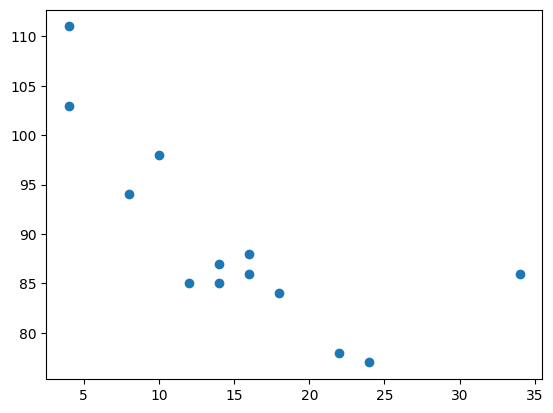

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

### 1. شیب (β₁):
β1 = (n * ΣXiYi - ΣXi * ΣYi) / (n * ΣXi² - (ΣXi)**2)

### 2. عرض از مبدأ (β₀):
β0 = Ȳ - β1 * X̄

In [4]:
X, Y, XiYi, Xi2 = 0, 0, 0, 0

n = len(x)

for i in range(n):
  X = X + x[i]
  Y = Y + y[i]
  XiYi = XiYi + x[i] * y[i]
  Xi2 = Xi2 + x[i] ** 2


print(f"n: {n} \nX: {X} \nY: {Y} \nXᵢYᵢ: {XiYi} \nχ²ᵢ: {Xi2}")

n: 13 
X: 196 
Y: 1162 
XᵢYᵢ: 16800 
χ²ᵢ: 3784


In [5]:
β1 = (n * XiYi - X * Y) / (n * Xi2 - X**2)

β0 = (Y- β1*X)/n
      
print(f"β₁ : {β1}", f"\nβ₀ : {β0}")

β₁ : -0.8678544914625093 
β₀ : 102.46919079435783


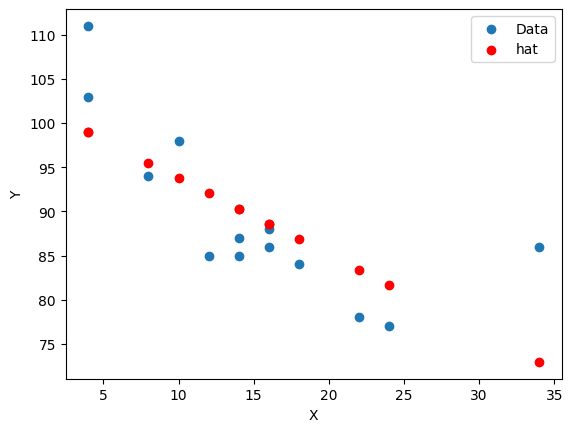

In [6]:
y_hat= []

for xi in x:
    Y_hat= β1 * xi + β0
    y_hat.append(Y_hat)

plt.scatter(x,y, label= "Data")
plt.scatter(x,y_hat, color= "red", label= "hat")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

______

# scipy از طرق کتابخانه‌ی

In [7]:
# برای نصب کتابخانه‌ها دستور زیر را ران کنید
# !pip install pandas

In [8]:
import pandas as pd

df= pd.DataFrame({"x": x, "y":y})
df

,x,y
0,10,98
1,14,85
2,16,88
3,14,87
4,4,111
5,34,86
6,4,103
7,16,86
8,8,94
9,22,78


In [9]:
df.corr()

,x,y
x,1.000000,-0.743605
y,-0.743605,1.000000


In [10]:
# برای نصب کتابخانه‌ها دستور زیر را ران کنید
# !pip install matplotlib

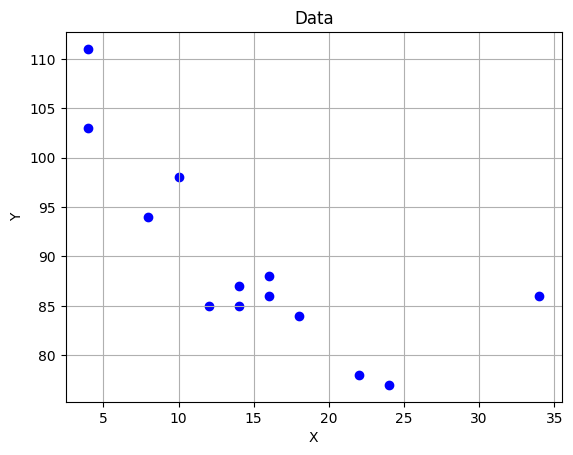

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x, y, color= "Blue")
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")

plt.grid()
plt.show()

In [12]:
# برای نصب کتابخانه‌ها دستور زیر را ران کنید
# !pip install scipy

In [13]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(slope, intercept)

-0.8678544914625094 102.46919079435784


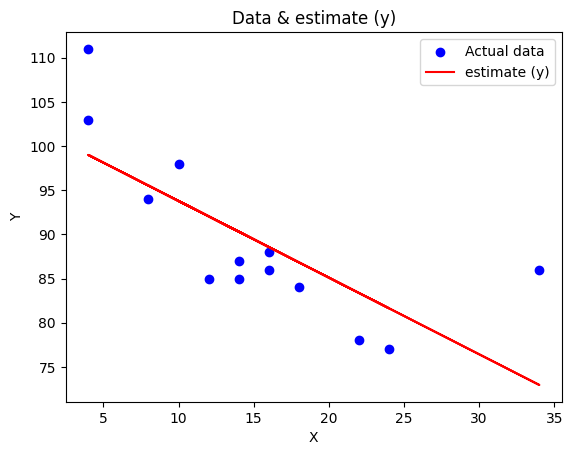

In [14]:
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y, color= "Blue", label="Actual data")
plt.plot(x, mymodel, color= "red", label= "estimate (y)")
plt.title("Data & estimate (y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

In [15]:
print(f"R = {r}")
print(f"β0 = {intercept}")
print(f"β1 = {slope}")

R = -0.7436049380328468
β0 = 102.46919079435784
β1 = -0.8678544914625094


# پیش‌بینی مقادیر آینده

یک نمونه‌ی آزمایشی

In [16]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed)

93.79064587973275


این مقادیر برای محورهای 

x و y 

باید منجر به برازش بسیار بدی برای رگرسیون خطی شوند:

In [17]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,50]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,25]

In [18]:
df= pd.DataFrame({"x": x, "y":y})
df

,x,y
0,89,21
1,43,46
2,36,3
3,36,35
4,95,67
5,10,95
6,66,53
7,34,72
8,38,58
9,20,10


In [19]:
df.corr()

,x,y
x,1.000000,-0.001803
y,-0.001803,1.000000


In [20]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [21]:
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

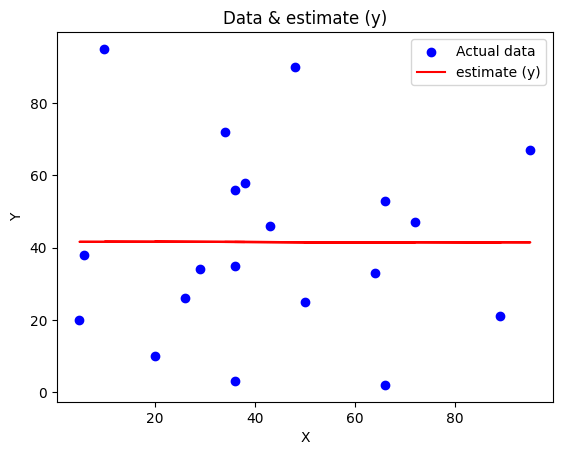

R = -0.0018026168879452934
β₀ = 41.630424350449026
β₁ = -0.0018509631863988518


In [22]:
plt.scatter(x, y, color= "Blue", label="Actual data")
plt.plot(x, mymodel, color= "red", label= "estimate (y)")
plt.title("Data & estimate (y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

print(f"R = {r}")
print(f"β₀ = {intercept}")
print(f"β₁ = {slope}")

___
___
___
# نسخه‌ی پیشرفته
___
___
___

### وارد کردن کتابخانه مورد نیاز

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### دانلود داده‌ها

برای دانلود داده‌ها، لینک زیر را در کروم کپی کنید

In [24]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)

with open("FuelConsumptionCo2.csv", "wb") as f:
    f.write(response.content)

## درک داده‌ها  

### `FuelConsumption.csv`  
[منبع داده](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

* **MODELYEAR** — سال مدل 
* **MAKE** — شرکت سازنده 
* **MODEL** — مدل خودرو 
* **VEHICLE CLASS** — کلاس خودرو 
* **ENGINE SIZE** — حجم موتور بر حسب لیتر 
* **CYLINDERS** — تعداد سیلندرها 
* **TRANSMISSION** — نوع گیربکس
* **FUEL CONSUMPTION in CITY (L/100 km)** — مصرف سوخت در شهر 
* **FUEL CONSUMPTION in HWY (L/100 km)** — مصرف سوخت در بزرگراه 
* **FUEL CONSUMPTION COMB (L/100 km)** — مصرف سوخت ترکیبی 
* **CO2 EMISSIONS (g/km)** — (بر حسب گرم در هر کیلومتر) CO₂ میزان انتشار 


## خواندن داده‌ها


In [25]:
df = pd.read_csv(r"FuelConsumptionCo2.csv")

df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### بررسی داده‌ها

بیایید ابتدا یک بررسی توصیفی بر روی داده‌های خود انجام دهیم.


In [26]:
# خلاصه‌سازی داده‌ها

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


بیایید چند ویژگی را برای بررسی بیشتر انتخاب کنیم

In [27]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


می‌توانیم هر یک از این ویژگی‌ها را ترسیم کنیم


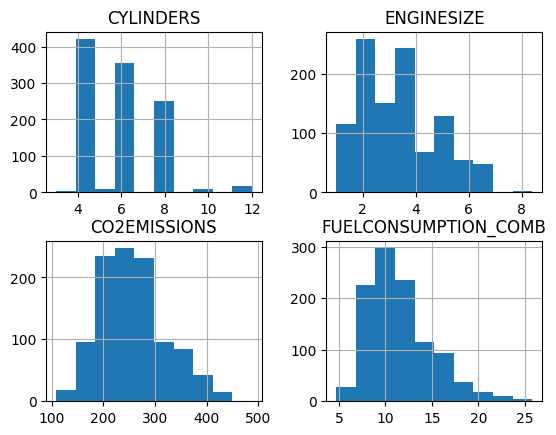

In [28]:
viz = cdf[["CYLINDERS","ENGINESIZE","CO2EMISSIONS","FUELCONSUMPTION_COMB"]]
viz.hist()
plt.show()

اکنون بیایید هر یک از این ویژگی‌ها را در برابر میزان انتشار ترسیم کنیم تا ببینیم رابطه‌ی آن‌ها تا چه اندازه خطی است

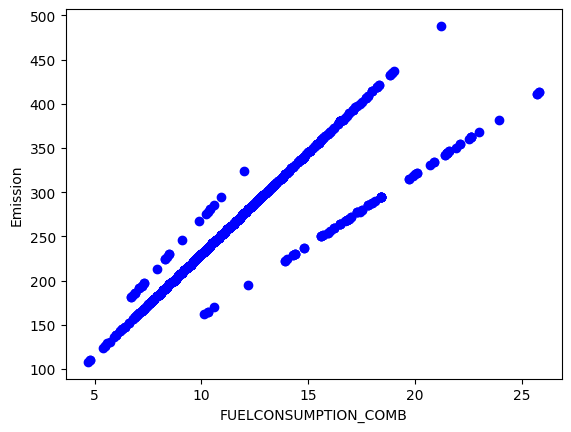

In [29]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

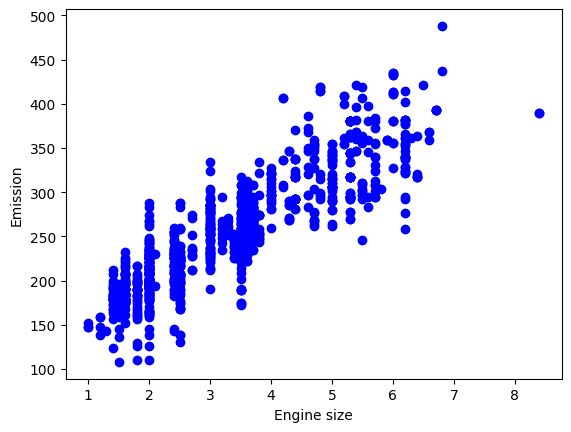

In [30]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color="blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## تمرین

را در برابر میزان انتشار رسم کنید تا ببینید رابطه‌ی آن‌ها تا چه اندازه خطی است **CYLINDER** نمودار


In [31]:
# کد خود را اینجا بنویسید



<details><summary>برای مشاهده‌ی پاسخ کلیک کنید</summary>

```python
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("تعداد سیلندرها")
plt.ylabel("میزان انتشار")
plt.show()
```

</details>


In [32]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### مدل رگرسیون ساده
برازش می‌دهد تا «مجموع مربعات باقیمانده‌ها» بین β = (β₁, ..., βₙ) رگرسیون خطی یک مدل خطی با ضرایب 

(با استفاده از تقریب خطی ) ŷ در مجموعه‌داده و مقدار پیش‌بینی‌شده y مقدار واقعی

را به حداقل برساند


#### توزیع داده‌های آموزشی


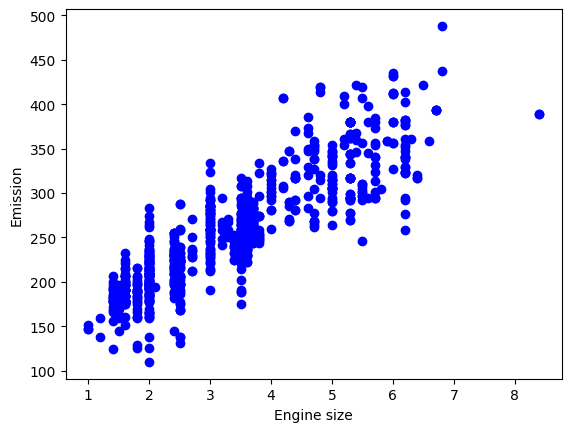

In [33]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color="blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### مدل‌سازی

برای مدل‌سازی داده‌ها sklearn استفاده از کتابخانه‌ی

In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)


print ("Coefficients: ", regr.coef_)
print ("Intercept: ",regr.intercept_)

Coefficients:  [[39.03136905]]
Intercept:  [125.88751165]


**عرض از مبدأ (Intercept)**

**ضرایب (Coefficient)**

#### ترسیم خروجی‌ها


می‌توانیم خط برازش‌شده را روی داده‌ها ترسیم کنیم


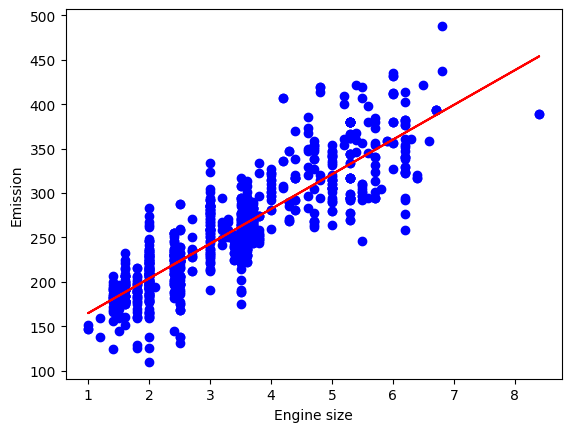

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], "red")

plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### ارزیابی

دقت مدل رگرسیون را با مقایسه‌ی مقادیر واقعی و مقادیر پیش‌بینی‌شده محاسبه می‌کنیم

استفاده می‌کنیم، معیارهای ارزیابی عبارت‌اند از **MSE** برای محاسبه‌ی دقت مدل بر اساس داده‌های آزمایشی از 
‌
___

* **میانگین قدر مطلق خطا (MAE - Mean Absolute Error):**

 میانگین مقدار قدر مطلق خطاها که ساده‌ترین معیار برای درک است، زیرا تنها میانگین خطا را نشان می‌دهد
___

* **میانگین مربعات خطا (MSE - Mean Squared Error):**

 محبوب‌تر است؛ MAE میانگین مربعات خطا نسبت به 

 زیرا به دلیل وجود جمله‌ی مربع، تأکید بیشتری بر خطاهای بزرگ دارد و آن‌ها را به‌صورت نمایی افزایش می‌دهد
 ___

* **ریشه‌ی میانگین مربعات خطا (RMSE - Root Mean Squared Error):**

* **ضریب تعیین (R² - R-squared):**

این مقدار یک خطا نیست بلکه معیاری محبوب برای سنجش عملکرد مدل رگرسیون است

نشان می‌دهد که نقاط داده تا چه اندازه به خط برازش نزدیک هستند

بالاتر باشد، مدل بهتر با داده‌ها منطبق است R-squared هرچه مقدار 

بهترین مقدار ممکن ۱ است، و حتی می‌تواند منفی باشد (زیرا ممکن است مدل بسیار بدتر از حد انتظار عمل کند)
___

In [36]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.08
Residual sum of squares (MSE): 935.91
R2-score: 0.77



<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
